In [41]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [42]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
animations = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tv_movie_animation.csv')

In [44]:
animations.head()

,title,desc,year,genre,certificate,runtime,rating,votes
0,Puss in Boots: The Last Wish,Puss in Boots discovers that his passion for a...,2022,"Animation, Adventure, Comedy",U,102 min,7.8,"18,226"
1,Strange World,The legendary Clades are a family of explorers...,2022,"Animation, Action, Adventure",PG,102 min,5.5,"27,296"
2,Guillermo del Toro's Pinocchio,A father's wish magically brings a wooden boy ...,2022,"Animation, Drama, Family",PG,117 min,7.7,"60,908"
3,Star Wars: The Bad Batch,The 'Bad Batch' of elite and experimental clon...,2021–,"Animation, Action, Adventure",PG,NaN,7.8,"35,962"
4,Rick and Morty,An animated series that follows the exploits o...,2013–,"Animation, Adventure, Comedy",16+,23 min,9.1,"527,839"


In [45]:
 #find the columns having null values
 animations.isnull().sum()

title              0
desc               0
year            2298
genre              0
certificate    21002
runtime         9318
rating          9080
votes           9079
dtype: int64

**Data pre-processing**

In [46]:
#dropping the rows containing null values for rating and votes columns
cleaned_animations_df = animations.dropna(axis = 0, subset = ['rating', 'votes'])

In [47]:
cleaned_animations_df.dtypes

title           object
desc            object
year            object
genre           object
certificate     object
runtime         object
rating         float64
votes           object
dtype: object

In [49]:
noOfvotes = cleaned_animations_df['votes'].str.replace(',', '')
noOfvotes

0         18226
1         27296
2         60908
3         35962
4        527839
          ...  
22321        14
22325        16
22328        20
22340        12
22352        16
Name: votes, Length: 13290, dtype: object

In [50]:
cleaned_animations_df.replace(['votes'],['noOfvotes'])
cleaned_animations_df.head()

,title,desc,year,genre,certificate,runtime,rating,votes
0,Puss in Boots: The Last Wish,Puss in Boots discovers that his passion for a...,2022,"Animation, Adventure, Comedy",U,102 min,7.8,"18,226"
1,Strange World,The legendary Clades are a family of explorers...,2022,"Animation, Action, Adventure",PG,102 min,5.5,"27,296"
2,Guillermo del Toro's Pinocchio,A father's wish magically brings a wooden boy ...,2022,"Animation, Drama, Family",PG,117 min,7.7,"60,908"
3,Star Wars: The Bad Batch,The 'Bad Batch' of elite and experimental clon...,2021–,"Animation, Action, Adventure",PG,NaN,7.8,"35,962"
4,Rick and Morty,An animated series that follows the exploits o...,2013–,"Animation, Adventure, Comedy",16+,23 min,9.1,"527,839"


**Recommendation system based on cosine similarity matrix**

In [51]:
#developing cosine similarity matrix
tf = TfidfVectorizer(analyzer='word',strip_accents = 'unicode',ngram_range=(1, 3),min_df=3, token_pattern = r'\w{1,}', stop_words='english')
tfidf_matrix = tf.fit_transform(cleaned_animations_df['desc'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [52]:
tfidf_matrix2 = tf.fit_transform(cleaned_animations_df['desc'].sample(n=50))
cosine_sim2 = linear_kernel(tfidf_matrix2, tfidf_matrix2)

Correlation of 50 randomly sampled animated tv shows


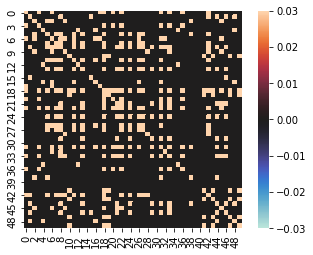

In [53]:
print('Correlation of 50 randomly sampled animated tv shows')
ax = sns.heatmap(
    cosine_sim2, 
    vmin=-0.03, vmax=0.03, center=0,
    square=True
)

**Content Based Recommendation system**

In [54]:
indices = pd.Series(cleaned_animations_df.index, index = cleaned_animations_df['title']).drop_duplicates()
indices

title
Puss in Boots: The Last Wish                    0
Strange World                                   1
Guillermo del Toro's Pinocchio                  2
Star Wars: The Bad Batch                        3
Rick and Morty                                  4
                                            ...  
Almasaqeel                                  22321
Wolpertinger Wochenschau                    22325
Robot Taekwon V 3tan! Sujung teukgongdae    22328
South Jersey Sam                            22340
Glee Spoofs                                 22352
Length: 13290, dtype: int64

In [55]:
#function returning the name, indices and similarity score of recommended movies
def give_rec(title):
  idx = indices[title]
  sig_scores = list(enumerate(cosine_sim[idx]))
  sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)
  sig_scores = sig_scores[1:11]
  animations_indices = [i[0] for i in sig_scores]
  return cleaned_animations_df['title'].iloc[animations_indices], sig_scores


In [56]:
give_rec('Strange World')

(2170                                  Go Jetters
 17834                             Amazing Aliens
 15816                            Tsuin shigunaru
 15504                              Mission Paisa
 1335                           The Garfield Show
 4361     Lupin the IIIrd: Jigen Daisuke no Bohyô
 1303                                    The Deep
 9306                          Planes with Brains
 7931                               Mighty Heroes
 8090                         Wanda and the Alien
 Name: title, dtype: object,
 [(2057, 0.22766861484350978),
  (12668, 0.20437355685983655),
  (12123, 0.1978517729187283),
  (12028, 0.19140365345002155),
  (1268, 0.169063315094259),
  (4133, 0.16832480292180493),
  (1237, 0.1658690161354941),
  (8541, 0.16315345262979983),
  (7383, 0.16171927309209588),
  (7523, 0.154462312326623)])